# Analysis of the "Honey Prices" database:

**Context:**

Honey is widely recognized for its numerous health benefits, being a natural sweetener full of therapeutic properties. Rich in antioxidants such as flavonoids and phenolic acids, honey helps combat free radicals in the body, reducing the risk of chronic diseases. Its antibacterial and antifungal properties contribute to wound healing and the prevention of infections.
There are various types of honey, each with unique characteristics in flavor, color, and medicinal properties, depending on the flower of origin. Honey prices vary widely based on type and origin. Common wildflower honey can be found at affordable prices, while Manuka honey (from New Zealand) can cost several times more due to its high demand and proven medicinal efficacy.
The global honey market has shown consistent growth, driven by increasing consumer awareness of health benefits and demand for natural products. Countries like China, Turkey, and the United States are among the largest global producers, with China leading in global production. Challenges in the market include honey adulteration and issues related to the sustainability of bee populations. Initiatives to ensure honey authenticity and promote sustainable beekeeping practices are essential to maintaining consumer confidence and the long-term health of the market.

In the present study, the characteristics of different types of honey were evaluated and related to market price. Additionally, a prediction model was trained to estimate honey prices based on their characteristics.

https://www.kaggle.com/datasets/raghav723/predict-price-of-honey

**Objective**: Obtain a prediction model to estimate the honey price based on the honey characteristics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split

## Data preparation and exploratory analysis:

Downloading the dataset e checking the number of rows and columns:

In [2]:
df = pd.read_csv('honey_purity_dataset.csv')
df

CS  Density     WC    pH    EC      F      G Pollen_analysis  \
0       2.81     1.75  23.04  6.29  0.76  39.02  33.63       Blueberry   
1       9.47     1.82  17.50  7.20  0.71  38.15  34.41         Alfalfa   
2       4.61     1.84  23.72  7.31  0.80  27.47  34.36        Chestnut   
3       1.77     1.40  16.61  4.01  0.78  31.52  28.15       Blueberry   
4       6.11     1.25  19.63  4.82  0.90  29.65  42.52         Alfalfa   
...      ...      ...    ...   ...   ...    ...    ...             ...   
247898  1.98     1.29  17.90  4.82  0.89  36.10  34.69        Rosemary   
247899  6.18     1.67  19.54  4.91  0.85  31.15  20.82          Acacia   
247900  7.78     1.49  15.78  5.69  0.73  44.60  44.07        Chestnut   
247901  5.78     1.74  14.96  6.81  0.83  47.19  37.79         Avocado   
247902  8.96     1.86  18.62  6.89  0.86  25.94  42.88        Lavender   

        Viscosity  Purity   Price  
0         4844.50    0.68  645.24  
1         6689.02    0.89  385.85  
2         6883.60    0.66  639.64  
3         7167.56    1.00  946.46  
4         5125.44    1.00  432.62  
...           ...     ...     ...  
247898    8261.63    1.00  754.98  
247899    6939.39    1.00  543.41  
247900    4139.79    0.64  615.46  
247901    4417.74    0.97  949.32  
247902    8119.62    0.64  384.48  

[247903 rows x 11 columns]

**Description:**

**CS (Color Score):**
Represents the color score of the honey sample, ranging from 1.0 to 10.0. Lower values indicate a lighter color, while higher values indicate a darker color.

**Density:**
Represents the density of the honey sample in grams per cubic centimeter at 25°C, ranging from 1.21 to 1.86.

**WC (Water Content):**
Represents the water content in the honey sample, ranging from 12.0% to 25.0%.

**pH:**
Represents the pH level of the honey sample, ranging from 2.50 to 7.50.

**EC (Electrical Conductivity):**
Represents the electrical conductivity of the honey sample in milliSiemens per centimeter.

**F (Fructose Level):**
Represents the fructose level of the honey sample, ranging from 20 to 50.

**G (Glucose Level):**
Represents the glucose level of the honey sample, ranging from 20 to 45.

**Pollen_analysis:**
Represents the floral source of the honey sample. Possible values include Clover, Wildflower, Orange Blossom, Alfalfa, Acacia, Lavender, Eucalyptus, Buckwheat, Manuka, Sage, Sunflower, Borage, Rosemary, Thyme, Heather, Tupelo, Blueberry, Chestnut, and Avocado.

**Viscosity:**
Represents the viscosity of the honey sample in centipoise, ranging from 1500 to 10000. Viscosity values between 2500 and 9500 are considered optimal for purity.

**Purity:**
The target variable represents the purity of the honey sample, ranging from 0.01 to 1.00.

**Price:**
The calculated price of the honey.

Checking the number of duplicates:

In [4]:
df.duplicated().sum()

0

Checking the number of null cells and the format types of the variables:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247903 entries, 0 to 247902
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CS               247903 non-null  float64
 1   Density          247903 non-null  float64
 2   WC               247903 non-null  float64
 3   pH               247903 non-null  float64
 4   EC               247903 non-null  float64
 5   F                247903 non-null  float64
 6   G                247903 non-null  float64
 7   Pollen_analysis  247903 non-null  object 
 8   Viscosity        247903 non-null  float64
 9   Purity           247903 non-null  float64
 10  Price            247903 non-null  float64
dtypes: float64(10), object(1)
memory usage: 20.8+ MB


### Descriptive analysis of the quantitative variable data:

In [6]:
df.describe().round(decimals=2)

CS    Density         WC         pH         EC          F  \
count  247903.00  247903.00  247903.00  247903.00  247903.00  247903.00   
mean        5.50       1.54      18.50       5.00       0.80      34.97   
std         2.59       0.19       3.75       1.44       0.06       8.66   
min         1.00       1.21      12.00       2.50       0.70      20.00   
25%         3.26       1.37      15.26       3.75       0.75      27.46   
50%         5.50       1.54      18.51       4.99       0.80      34.97   
75%         7.74       1.70      21.75       6.25       0.85      42.47   
max        10.00       1.86      25.00       7.50       0.90      50.00   

               G  Viscosity     Purity      Price  
count  247903.00  247903.00  247903.00  247903.00  
mean       32.50    5752.89       0.82     594.81  
std         7.23    2455.74       0.14     233.63  
min        20.00    1500.05       0.61     128.72  
25%        26.23    3627.88       0.66     433.00  
50%        32.49    5753.77       0.82     612.96  
75%        38.76    7886.65       0.97     770.22  
max        45.00    9999.97       1.00     976.69

### Checking the data distribution and correlations of the quantitative variables:

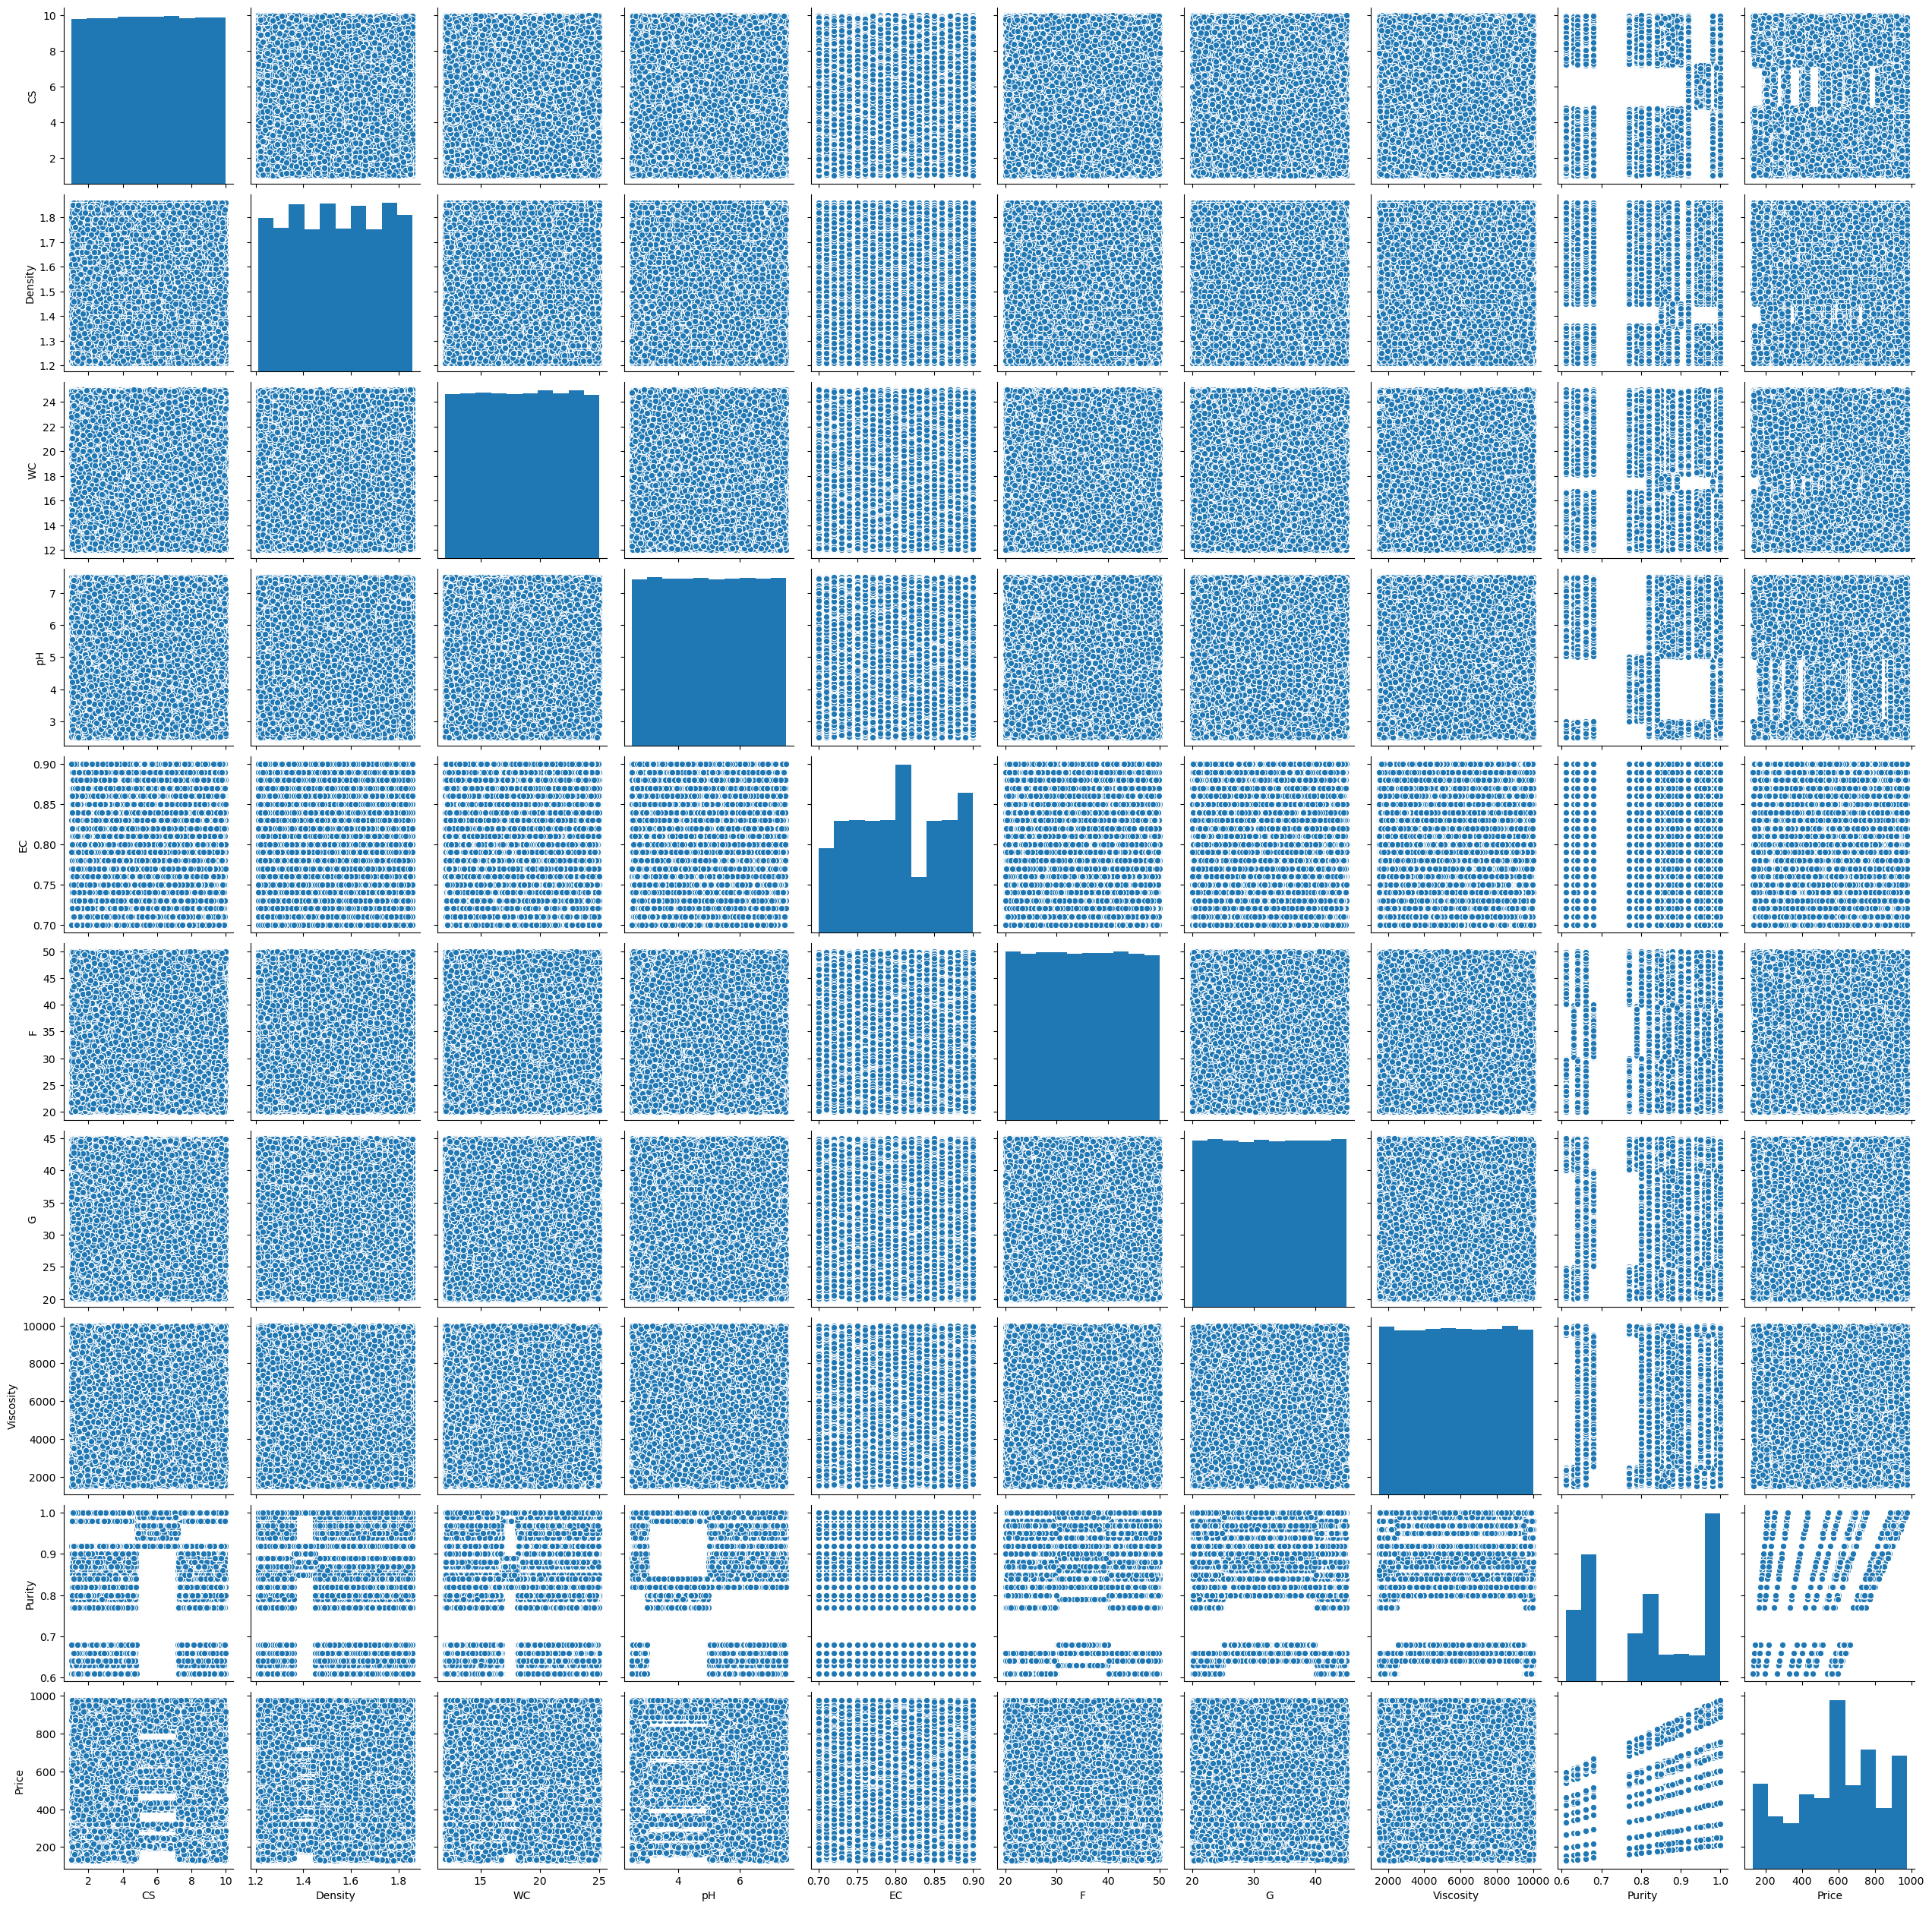

In [7]:
sns.pairplot(df);

The "Purity" variable presents a moderate linear and positive correlation with the price variable, presenting a Spearman coefficient value of 0.45.
The "pH" variable showed a weak linear and negative correlation with the "Purity" variable, presenting a Spearman coefficient value of -0.23.  

We can infer that the remain features do not present any type of linear correlation.

Obtaining a scatterplot for the variables 'Price' and 'Purity', with a linear trend line:

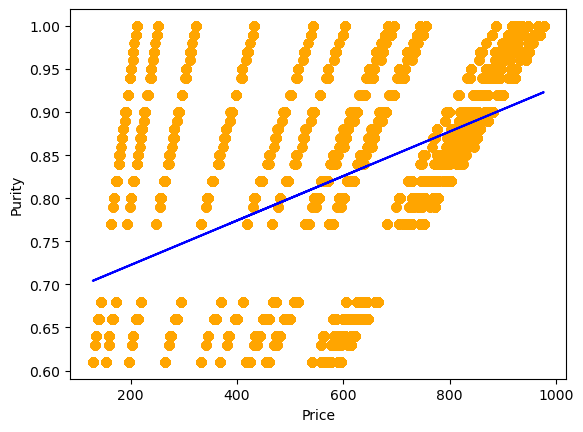

In [10]:
x = df['Price']
y = df['Purity']

plt.scatter(x, y,c='orange')
m,b = np.polyfit(x, y, 1)
y_ = m*x + b

plt.plot(x, y_ , color = 'blue')
plt.xlabel('Price')
plt.ylabel('Purity') ;

Obtaining a boxplot graph for the categories of the "Pollen_analysis" variable:

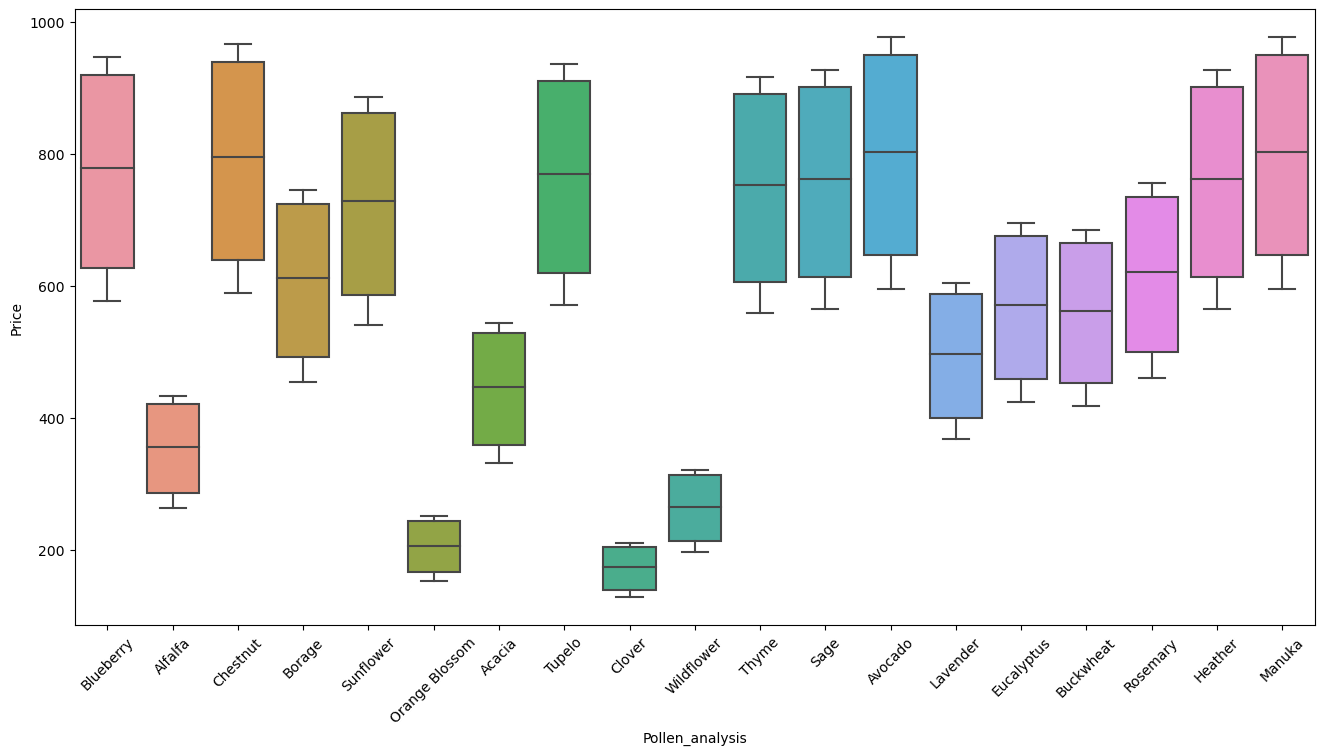

In [296]:
fig = plt.figure(figsize=(16,8))

sns.boxplot(x='Pollen_analysis', y= 'Price', data = df)
plt.xticks(rotation=45) ;

The boxplot graph indicates that honeys from the following pollen categories tend to have a higher price (higher than $700):
- Blueberry
- Chestnut
- Sunflower
- Tupelo
- Thyme
- Sage
- Avocado
- Heather
- Manuka

Observing the histograms in the pairplot graph, we notice that the features do not have a normal distribution. 
In reality, most variables have a uniform distribution.

Therefore, to estimate the linear correlation coefficients between the variables, we chose to use the Spearman correlation coefficient instead of the Pearson coefficient.

#### SPEARMAN Correlation Coefficients for all quantitative variables:

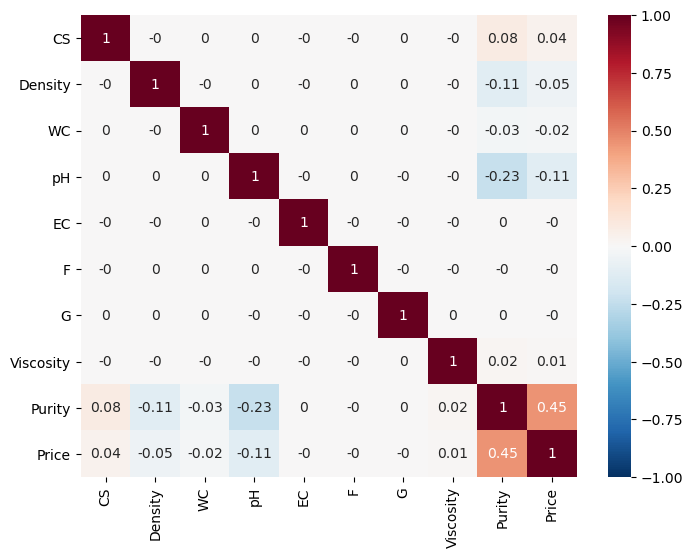

In [12]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(df.corr(method='spearman').round(decimals=2), 
            cmap='RdBu_r', 
            vmin=-1, vmax=1, 
            annot=True);

## Prediction Model (Random Forest Regressor)

In [7]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import sys
from hyperopt import space_eval

In [8]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [9]:
from sklearn.ensemble import RandomForestRegressor

### Preparing the data for training:

Defining the features set (x) and the target (y):

In [235]:
y = df['Price']

x_num = df.drop(['Price','Pollen_analysis'],axis=1).to_numpy()

x_cat = pd.DataFrame(df['Pollen_analysis'])

Tranforming the categories of the categorical variable into dummies:

In [236]:
from sklearn.preprocessing import OneHotEncoder 

x_cat_enc = OneHotEncoder()
x_cat_ = x_cat_enc.fit_transform(x_cat).toarray()

In [237]:
x = np.concatenate([x_num, x_cat_], axis=1) 

In [238]:
x_feat_num = list(df.drop(['Price','Pollen_analysis'],axis=1).columns)

Name of the features (including the new features created):

In [239]:
x_feat_cat = ['Pollen_analysis']

feat_lst = x_feat_num + list(x_cat_enc.get_feature_names_out(x_feat_cat))
feat_lst

['CS',
 'Density',
 'WC',
 'pH',
 'EC',
 'F',
 'G',
 'Viscosity',
 'Purity',
 'Pollen_analysis_Acacia',
 'Pollen_analysis_Alfalfa',
 'Pollen_analysis_Avocado',
 'Pollen_analysis_Blueberry',
 'Pollen_analysis_Borage',
 'Pollen_analysis_Buckwheat',
 'Pollen_analysis_Chestnut',
 'Pollen_analysis_Clover',
 'Pollen_analysis_Eucalyptus',
 'Pollen_analysis_Heather',
 'Pollen_analysis_Lavender',
 'Pollen_analysis_Manuka',
 'Pollen_analysis_Orange Blossom',
 'Pollen_analysis_Rosemary',
 'Pollen_analysis_Sage',
 'Pollen_analysis_Sunflower',
 'Pollen_analysis_Thyme',
 'Pollen_analysis_Tupelo',
 'Pollen_analysis_Wildflower']

In [240]:
df_x = pd.DataFrame(x, columns = feat_lst)

Dividing into training, test and validation:

In [241]:
x_train, x_test, y_train, y_test = train_test_split(df_x, y, 
                                                    test_size= 0.30,
                                                    random_state= 42) 

x_train_, x_valid, y_train_, y_valid = train_test_split(x_train, y_train, 
                                                    test_size= 0.20,
                                                    random_state= 42) 

### Optimization of hyperparameters:

The Bayesian optimization technique was used to find the best hyperparameters for the model.

Defining the function structure of the prediction model:

In [242]:
def train_RF (estimators, max_dp): 
    
    model_rf = RandomForestRegressor(n_estimators= estimators,               
                                     max_depth= max_dp,
                                    random_state = 42)
    return model_rf

Definition of the hyperparametric space:

In [243]:
est = np.arange(20, 110, 10)

maxdp = np.arange(3, 15, 1) 

param_grid = dict(estimators=est,
                  max_dp = maxdp)

In [23]:
bo_space = {'estimators': hp.choice('estimators', param_grid['estimators']),
             'max_dp': hp.choice('max_dp', param_grid['max_dp'])}

Defining the function that will be optimized:

In [28]:
def bo_random_for(param):   

    print ('tested_hyperparameters: ', param)
    model_rf = train_RF(estimators=param['estimators'], 
                         max_dp=param['max_dp'])   
    
    model_rf.fit(x_train_, y_train_)    
      
    y_pred_train = model_rf.predict(x_train_)
    y_pred_valid = model_rf.predict(x_valid)
    
    r2_train = r2_score(y_train_, y_pred_train)
    r2_valid = r2_score(y_valid, y_pred_valid)
    
    print('r2_train :',r2_train, 'r2_valid :',r2_valid)
    
    return {'loss': -r2_valid,'status': STATUS_OK}  

Defining the parameters of the "fmin" optimization function:

In [29]:
trials = Trials()                  
bo_search = fmin(fn= bo_random_for,       
                 space= bo_space,  
                 algo=tpe.suggest, 
                 max_evals=20,     
                 trials=trials)

tested_hyperparameters:                                                                                                
{'estimators': 90, 'max_dp': 7}                                                                                        
r2_train :                                                                                                             
0.8769565262879598                                                                                                     
r2_valid :                                                                                                             
0.8767680796895456                                                                                                     
tested_hyperparameters:                                                                                                
{'estimators': 50, 'max_dp': 11}                                                                                       
r2_train :                              

Obtaining the best hyperparameters:

In [30]:
bo_better_hp = space_eval(bo_space, bo_search)
print('Better hyperparameters: ', bo_better_hp)

Better hyperparameters:  {'estimators': 100, 'max_dp': 13}


### Fitting the chosen model (best hyperparameters):

In [72]:
model_rf = train_RF(estimators=100, 
                    max_dp=13)  

model_rf.fit(x_train_, y_train_)

RandomForestRegressor(max_depth=13, random_state=42)

Function to obtain the performance metrics with the testing and training base:

In [254]:
def preformance_reg(model, x_train, y_train, x_test, y_test):

    y_train_pred = model.predict(x_train)
    y_test_pred  = model.predict(x_test)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test =  r2_score(y_test, y_test_pred)

    rmse_train = sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test  = sqrt(mean_squared_error(y_test,  y_test_pred))
    
    df_per = pd.DataFrame({'Train':[r2_train, rmse_train],
                            'Test':[r2_test, rmse_test]},
                            index=['R²','RMSE'])
    
    df_per['Train'] = df_per['Train'].round(2)
    df_per['Test'] = df_per['Test'].round(2)
    df_per['Variation_%'] = round(100*(df_per['Test'] /df_per['Train'] - 1), 2)
    
    return df_per

In [255]:
preformance_reg(model_rf, x_train_, y_train_, x_test, y_test)

Train   Test  Variation_%
R²     0.99   0.99         0.00
RMSE  16.63  16.62        -0.06

A Coefficient of Determination value of 0.99 was obtained. This means that the model explains 99% of the price variability.

## Interpreting the model:

"SHAP values" (Shapley Additive explanations) are a technique for interpreting machine learning models that assigns a contribution to each input variable for the difference between the model output and the expected value of the output.

Positive SHAP Value: Indicates that the feature increases the model's prediction in relation to the base value (or expected value).

Negative SHAP Value: Indicates that the feature reduces the model's prediction in relation to the base value.

In [57]:
import shap

Obtaining a sample with less than 1000 observations:

In [81]:
x_sample = x_train_.sample(frac=0.007)

In [262]:
x_sample.shape

(972, 28)

Getting the shap values:

In [83]:
rf_explainer = shap.TreeExplainer(model=model_rf, 
                                  data= x_sample)

rf_shap_values = rf_explainer.shap_values(X= x_sample)

### Obtaining the most important variables (for the prediction model):

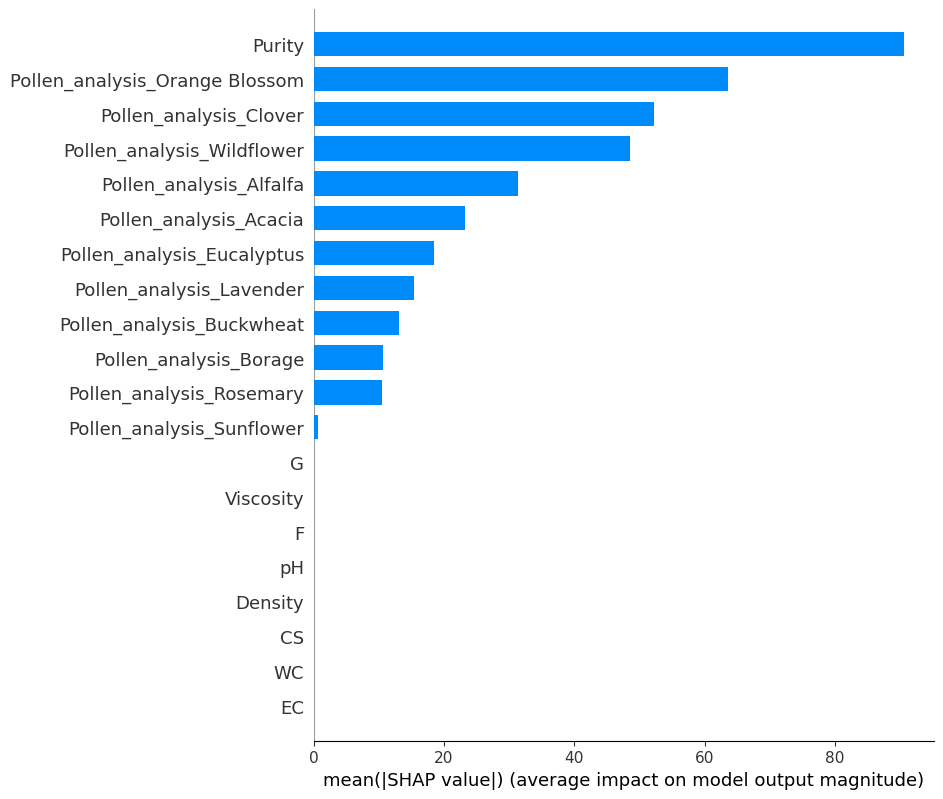

In [85]:
shap.summary_plot(shap_values=rf_shap_values,
                  plot_type='bar',
                  feature_names=feat_lst)

The variables that really impact the price are: 
- Purity
- Pollen_analysis_Orange Blossom
- Pollen_analysis_Clover
- Pollen_analysis_Alfalfa
- Pollen_analysis_Acacia
- Pollen_analysis_Eucalyptus
- Pollen_analysis_Lavender
- Pollen_analysis_Buckwheat
- Pollen_analysis_Borage
- Pollen_analysis_Rosemary
- Pollen_analysis_Sunflower

For an individual sample, the sum of the SHAP values of all features is equal to the difference between the value estimated by the model for that sample and the "expected value (base value)". The “expected value” is the mean compressive strength considering all values estimated by the prediction model.

Value estimated by the model = Expected value + sum (SHAP values of the features)

"The expected value" (mean value):

In [257]:
round(rf_explainer.expected_value,2)

581.07

"The expected value" is a price of $581.

### Checking the magnitude of the impact of each variable:

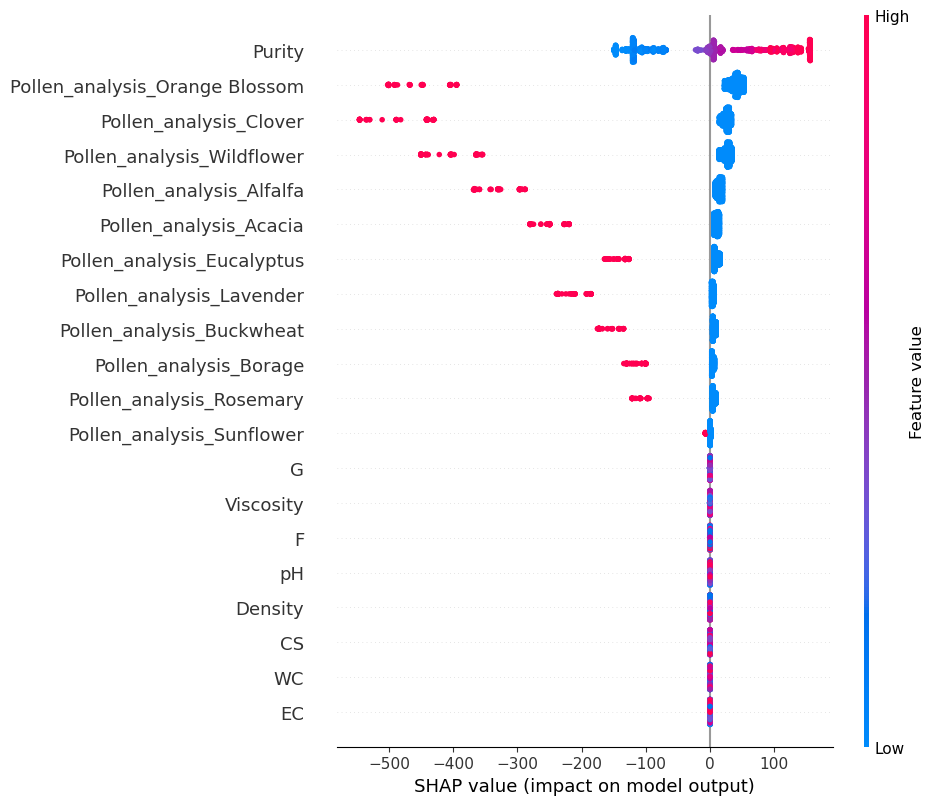

In [86]:
shap.summary_plot(shap_values=rf_shap_values, 
                  features=x_sample,
                  feature_names=feat_lst,
                  plot_type='dot')

The types of pollen present in the graph are responsible for the reduction in the price of honey. 
To exemplify, a Honey from "Clover" pollen tends to be responsible for a reduction of 400 to 550 in the price of honey (considering a expected value of $ 581).

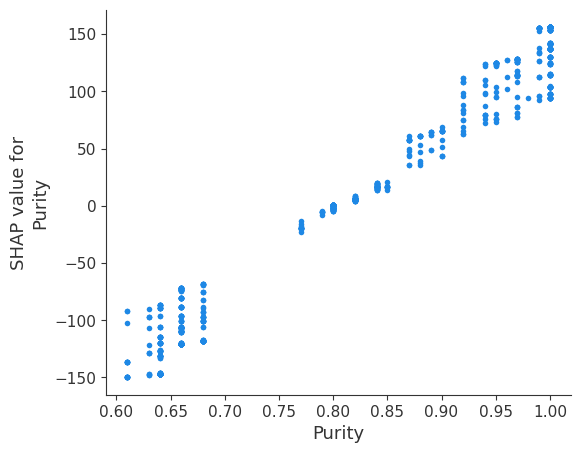

In [198]:
shap.dependence_plot(ind='Purity', 
                     shap_values=rf_shap_values, 
                     features=x_sample,
                     feature_names=feat_lst, 
                     interaction_index= None)

This result means that the higher the purity, the higher the honey price. Starting from a price of  581 (the expected value), the price increase could exceed  150.
On the other hand, a purity of 0.60, considered low, tends to cause a reduction of between  100 and 150 in the price of honey.

### Predicting the value of the target variable for specific individual observations:

In [223]:
sample = x_sample.to_numpy()

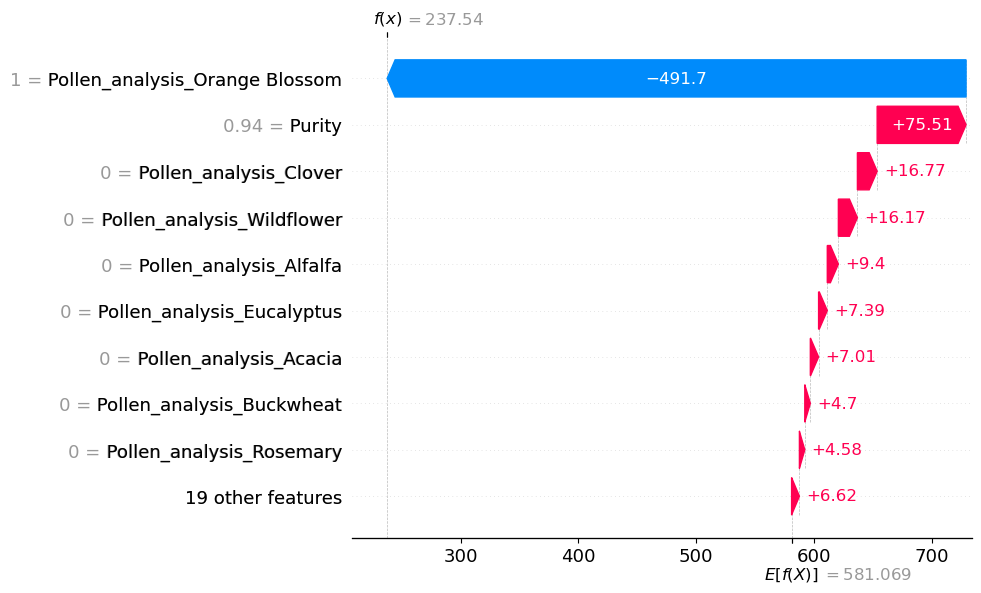

In [277]:
id_obs = 4

shap.plots._waterfall.waterfall_legacy(expected_value=rf_explainer.expected_value,
                                       shap_values=rf_shap_values[id_obs],
                                       feature_names=feat_lst, 
                                       features=sample[id_obs])

Considering the honey with a purity of 0.94 and coming from the "Orange Blosson" pollen, we obtain a price of $ 237.54.

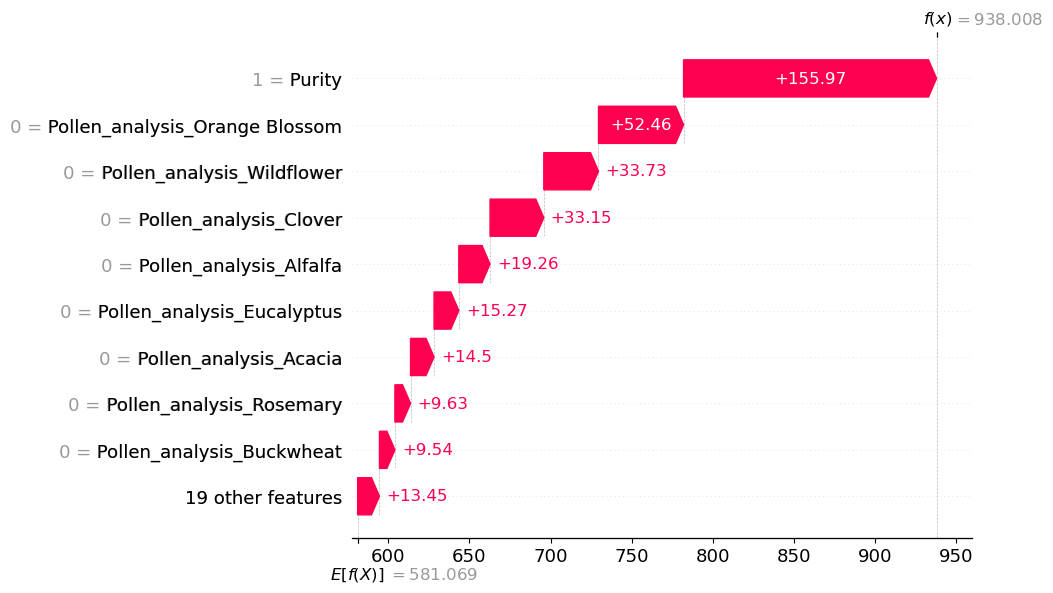

In [274]:
id_obs = 113

shap.plots._waterfall.waterfall_legacy(expected_value=rf_explainer.expected_value,
                                       shap_values=rf_shap_values[id_obs],
                                       feature_names=feat_lst, 
                                       features=sample[id_obs])

The graph above does not show us the origin of the honey (type of pollen).
Therefore, we can find it out through the code:

In [295]:
xx = x_sample.iloc[113][9:28]
result = xx[xx==1]
result

Pollen_analysis_Avocado    1.0
Name: 147139, dtype: float64

Considering honey with maximum purity (1) and coming from "Avocado" pollen, we obtain a price of $ 938.

Observing the boxplot graph obtained in the exploratory analysis section, we see that honey originating from avocado pollen tends to have higher prices.